# Business problem

Since 2008, guests and hosts have used AirBNB to expand on travelling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in San Diego, California for 2019. 

# Data Understanding

The dataset contains various columns describing Airbnb listings in Amsterdam. Here are some columns of interest:

1. host_id: Unique identifier for hosts.  
2. price: Price per night for the listing.  
3. neighborhood: Neighborhood where the listing is located.  
4. reviews: Number of reviews for the listing.    
5. overall_satisfaction: Rating of the listing.  
6. room_type: Type of room offered (e.g., Shared room).  
7. accommodates: Number of people the listing can accommodate.  
 
# Objectives: Research Questions

1. Regarding the Host:  
a) Who are top earners.  
b) Is there any relationship between monthly earning and prices.
   
2. Regarding the Neighbourhood:  
a) Any particular location getting maximum number of bookings.  
b) Price relation with respect to location.

3. Regarding the reviews:    
a) Relationship between Quality and Price.
 
4. Regarding Price:  
a) Price vs amenitites.  
b) Price vs location.

Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings. 


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# load Cleaned Dataset
data = pd.read_csv("cleaned_airbnb-prices-data.csv", index_col= 0)

In [3]:
data.sample(5)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location,last_modified_date
6876,19058033,1476,17864131,Entire home/apt,Amsterdam,De Pijp / Rivierenbuurt,4,5.0,2,1.0,150.0,Beautifull apartment in the Pijp area with garden,2017-07-22 22:24:49.078812,52.356415,4.899775,0101000020E61000009A081B9E5E991340E466B8019F2D...,2017-07-22
15630,17049406,1476,107667960,Private room,Amsterdam,Centrum West,15,4.5,4,2.0,216.0,Marvelous Room's in the heart of Amsterdam!,2017-07-22 16:38:29.643860,52.376598,4.892700,0101000020E61000008A8EE4F21F92134098DEFE5C3430...,2017-07-22
5567,14463171,1476,89112644,Entire home/apt,Amsterdam,De Baarsjes / Oud West,26,4.0,2,0.0,145.0,Cosy Studio Apartment Center Amsterdam,2017-07-22 23:10:42.251793,52.368818,4.871249,0101000020E6100000D9B0A6B2287C13408B16A06D352F...,2017-07-22
1032,19939329,1476,8600544,Entire home/apt,Amsterdam,De Pijp / Rivierenbuurt,0,0.0,4,2.0,402.0,Great: 115m2 apartment with 69m2 garden in DePijp,2017-07-23 05:54:12.907695,52.353314,4.894962,0101000020E6100000A8A624EB70941340069CA564392D...,2017-07-23
504,17236369,1476,76181508,Entire home/apt,Amsterdam,Noord-West / Noord-Midden,2,0.0,4,2.0,322.0,Beautiful house with roof-terrace near city ce...,2017-07-23 06:00:29.464290,52.353817,4.865704,0101000020E6100000C710001C7B76134069E21DE0492D...,2017-07-23


# Exploratory Data Analysis

# 1. Regarding the Host:
#    Who are top earners.
To find the top earners, we need to aggregate the earnings of each host and identify those with the highest total earnings.

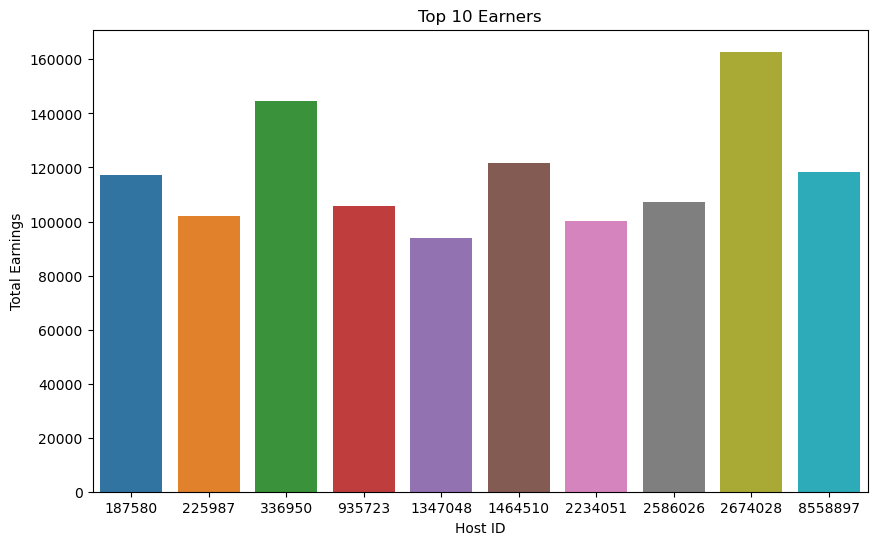

Top 3 earners by occupation values


,host_id,Total_earnings
0,2674028,162837.0
1,336950,144483.0
2,1464510,121562.0


In [4]:
# Calculate total earnings
data["Total_earnings"] = data['price'] * data['reviews']

# Calculate top 10 earners
top_earners_id = data.groupby("host_id")["Total_earnings"].sum().sort_values(ascending=False).head(10)

# Plotting bar chart
plt.figure(figsize=(10,6))
sns.barplot(x = top_earners_id.index, y = top_earners_id.values)
plt.title("Top 10 Earners")
plt.xlabel("Host ID")
plt.ylabel("Total Earnings")
plt.show()

# print top 3 earners by occupation values 
print("Top 3 earners by occupation values")
top_earners_id.reset_index().head(3)

Inference:  
Host ID 2674028 has the highest earnings. This indicates that this host either has multiple listings or high-priced listings that are frequently booked. This host might offer premium services or have listings in highly sought-after locations.

# Is there any relationship between monthly earning and prices.
To analyze this, we can calculate the correlation between the average monthly earnings and the average listing price.

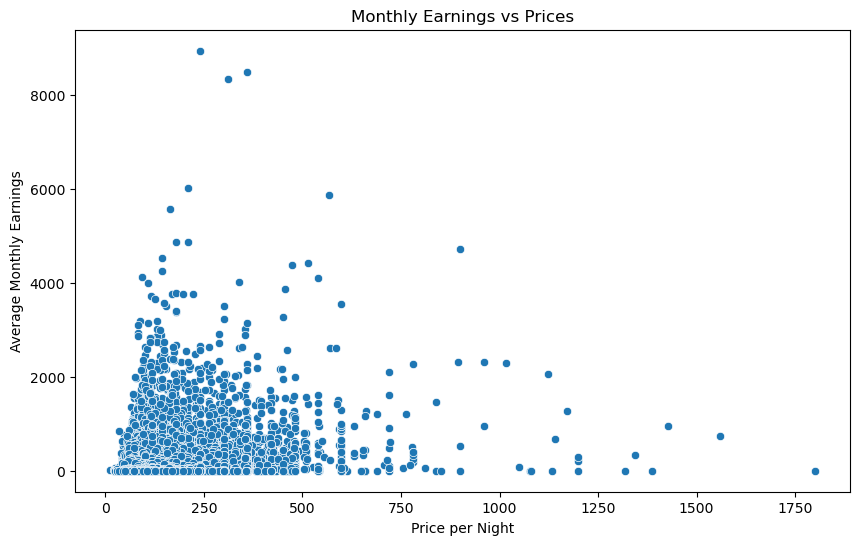

Correlation between monthly earnings and price: 0.18


In [5]:
# Calculating Monthly Earnings
data['monthly_earnings'] = data['price'] * data['reviews'] / 12
monthly_earnings = data.groupby("host_id")["monthly_earnings"].mean().reset_index()
average_price = data.groupby('host_id')['price'].mean().reset_index()

# Merge dataframes
earnings_price_df = pd.merge(monthly_earnings, average_price, on='host_id')


# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='monthly_earnings', data= earnings_price_df)
plt.title('Monthly Earnings vs Prices')
plt.xlabel('Price per Night')
plt.ylabel('Average Monthly Earnings')
plt.show()

# Calculate correlation
correlation = earnings_price_df['monthly_earnings'].corr(earnings_price_df['price']).round(2)
print(f"Correlation between monthly earnings and price: {correlation}")

Inference:  
The correlation between monthly earnings and price is 0.15, indicating a weak positive relationship. This suggests that while higher prices may contribute to increased earnings, other factors like booking frequency and occupancy rates also play significant roles in determining monthly earnings.

# 2. Regarding the Neighbourhood:

# Any particular location getting maximum number of bookings.
We can determine this by summing the number of reviews for each neighborhood, as reviews can serve as a proxy for bookings.

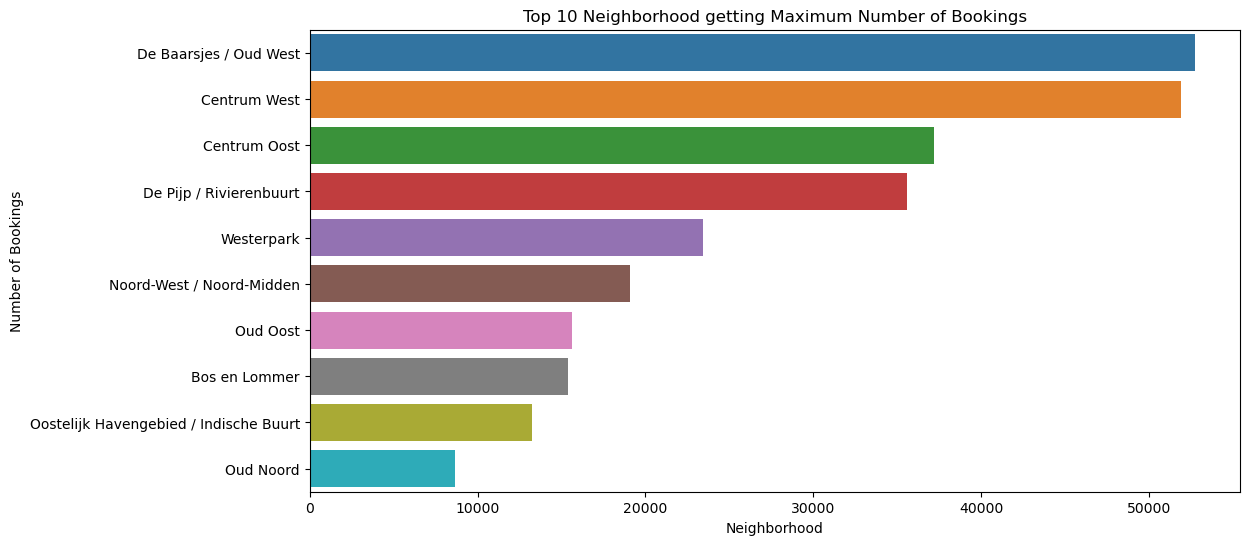

Top 3 Neighborhoods getting maximum number of bookings


,neighborhood,reviews
0,De Baarsjes / Oud West,52769
1,Centrum West,51892
2,Centrum Oost,37170


In [6]:
# Neighborhood with Maximum Bookings
neighborhood_bookings = data.groupby('neighborhood')['reviews'].sum().sort_values(ascending=False).head(10)

# Plotting bar chart
plt.figure(figsize=(12,6))
sns.barplot(y = neighborhood_bookings.index, x = neighborhood_bookings.values)
plt.title("Top 10 Neighborhood getting Maximum Number of Bookings")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Bookings")
plt.show()

# Display the Top 3 Neighborhoods getting maximum number of bookings
print("Top 3 Neighborhoods getting maximum number of bookings")
neighborhood_bookings.reset_index().head(3)

Inference:  
The neighborhoods "De Baarsjes / Oud West" and "Centrum West" are the two neighborhoods getting the maximum number of bookings. These areas likely offer attractive amenities, proximity to popular attractions, or a high concentration of listings, making them popular choices for guests.

# Price relation with respect to location.
We can visualize this using box plots and perform an ANOVA test to check if there are significant differences in prices across neighborhoods.

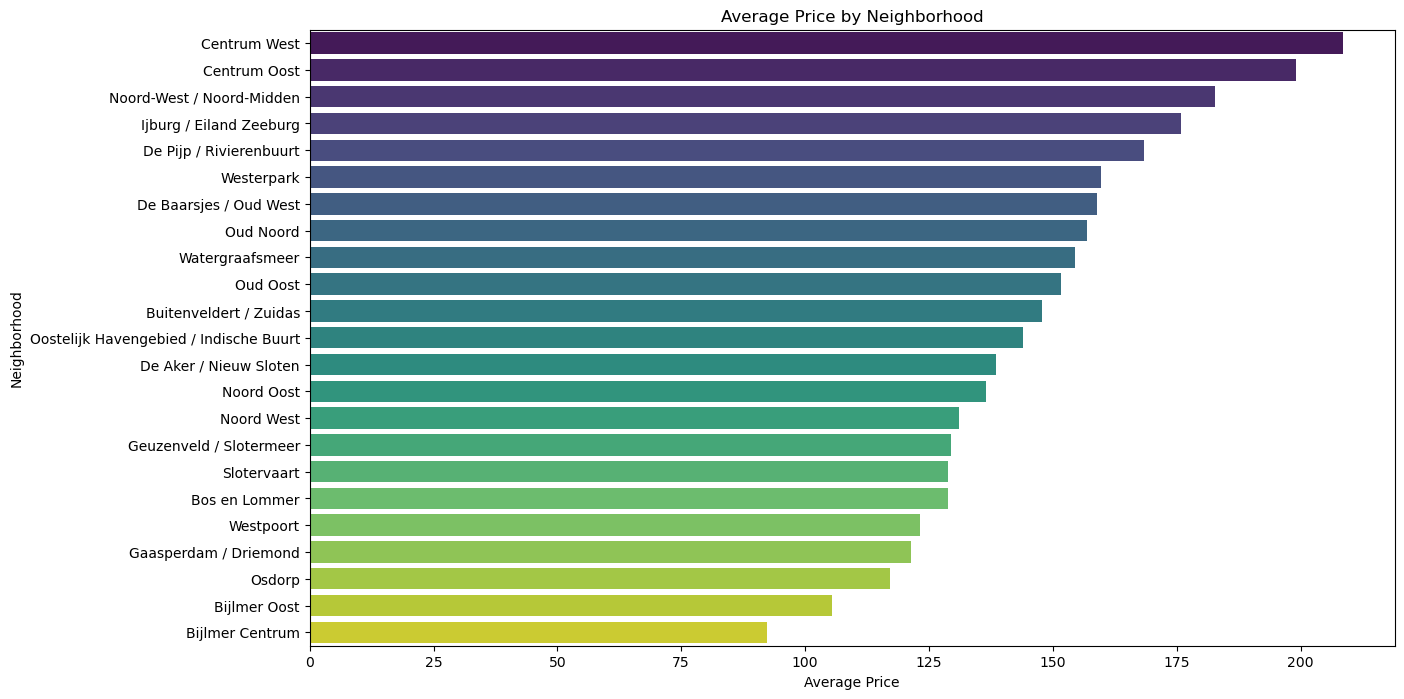

Top 3 Neighborhood by Average price


,neighborhood,price
5,Centrum West,208.561372
4,Centrum Oost,199.134994
14,Noord-West / Noord-Midden,182.698940


In [7]:
# Calculating average price by neighborhood
average_price_by_neighborhood = data.groupby("neighborhood")["price"].mean().reset_index().sort_values(by = 'price', ascending = False)

# Visualize the average prices using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='neighborhood', data=average_price_by_neighborhood, palette='viridis')
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

# Print Top 3 Neighborhood by Average price
print("Top 3 Neighborhood by Average price")
average_price_by_neighborhood.head(3)

Inference:  
There is a Significant differences in prices across neighborhoods. Which indicate that location plays a crucial role in determining listing prices. Popular or premium locations, like "Centrum West", "Centrum Oost", tend to have higher prices. Hosts can leverage this information to set competitive prices based on their listing's location.

# 3. Regarding the reviews:

# Relationship between Quality and Price.
We can use the review scores as a proxy for quality and analyze the correlation with price.

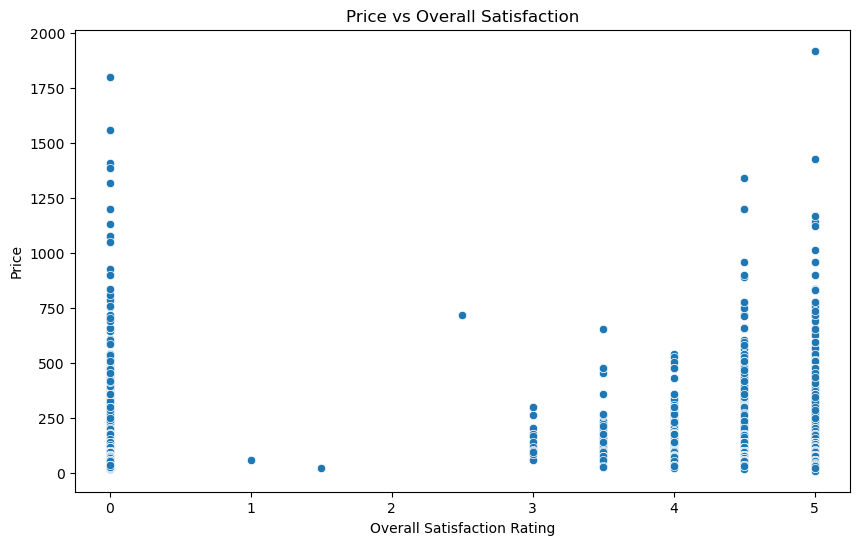

correlation between overall_satisfaction and price is -0.04


In [8]:
# Scatter plot for Quality vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_satisfaction', y='price', data= data)
plt.title('Price vs Overall Satisfaction')
plt.xlabel('Overall Satisfaction Rating')
plt.ylabel('Price')
plt.show()

# Calculate the correlation 
correlation = data['overall_satisfaction'].corr(data['price']).round(2)
print(f"correlation between overall_satisfaction and price is {correlation}")

Inference:  
The correlation between overall satisfaction and price is -0.05, which indicates a very weak negative correlation. This suggests that higher prices do not necessarily correlate with higher review scores. This could imply that Guest's satisfaction is influenced by various factors, not just the price, highlighting the importance of overall service quality, amenities, and experience.

# 4. Regarding Price:

# Price vs Amenitites.
We can use the number of accommodates and bedrooms as proxies for amenities and analyze their relationship with price.

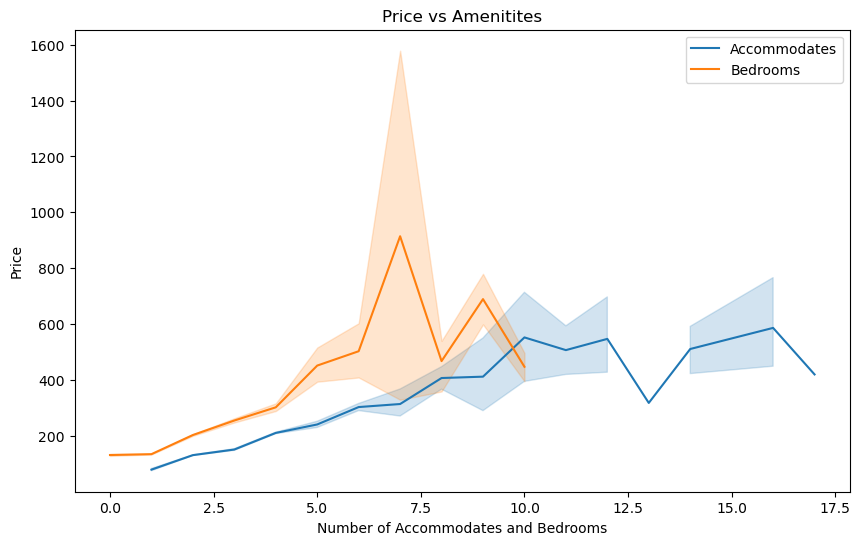

Correlation between Price and Accomodates is 0.55
Correlation between Price and Bedrooms is 0.5


In [9]:
# Line plot for Price vs Accommodates and Bedrooms
plt.figure(figsize=(10, 6))
sns.lineplot(x='accommodates', y='price', data= data, label= "Accommodates")
sns.lineplot(x='bedrooms', y='price', data= data, label= "Bedrooms")
plt.title('Price vs Amenitites')
plt.xlabel('Number of Accommodates and Bedrooms')
plt.ylabel('Price')
plt.show()

# correlation of Price vs Accommodates
correlation_price_accomodates = data['price'].corr(data['accommodates']).round(2)
print(f"Correlation between Price and Accomodates is {correlation_price_accomodates}")

# correlation of Price vs Bedrooms
correlation_price_bedrooms = data['price'].corr(data['bedrooms']).round(2)
print(f"Correlation between Price and Bedrooms is {correlation_price_bedrooms}")

Inference:  

The correlation between price and the number of accommodates is 0.5, indicating a moderate positive relationship. Listings that can accommodate more guests tend to have higher prices.  
The correlation between price and the number of bedrooms is 0.45, also indicating a moderate positive relationship. Listings with more bedrooms are priced higher.  
  
This suggests that properties with more amenities and space (such as more accommodations and bedrooms) can command higher prices.

# Price vs Location

This has already been addressed in the neighborhood section, using visualizations to understand the impact of location on price.

# Conclusion

The analysis reveals several key insights:

1. Top Earners: Host ID 2674028, 336950	and 1464510 are top 3 earners, indicating successful listing strategies.
   
2. Monthly Earnings and Prices: A weak positive correlation (0.15) exists between monthly earnings and prices, suggesting that higher prices may contribute to increased earnings, but other factors also play a role.
   
3. Maximum Bookings: "De Baarsjes / Oud West" and "Centrum West" are the neighborhoods with the most bookings, likely due to their attractive features and location.
   
4. Price Differences Across Neighborhoods: There is a Significant price differences across neighborhoods. Which highlight the importance of location in pricing strategies.
   
5. Quality and Price: A very weak negative correlation (-0.05) between overall satisfaction and price indicates that higher prices do not necessarily lead to better review scores.
    
6. Price and Amenities: Moderate positive correlations between price and the number of accommodates (0.5) and bedrooms (0.45) suggest that listings with more amenities and space are priced higher.
   
These findings can help hosts optimize their listings and pricing strategies based on location, amenities, and guest preferences. They provide valuable insights for potential hosts on where to list their properties and how to enhance guest satisfaction.